In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blob
import pandas as pd

ImportError: cannot import name 'make_blob' from 'sklearn.datasets' (/Users/TracyTao/anaconda3/lib/python3.11/site-packages/sklearn/datasets/__init__.py)

In [34]:
import pandas as pd
txt_file_path = "/Users/TracyTao/Desktop/Singapore/NUS/PHM5005/ML/GSE68833_series_matrix.txt"
df = pd.read_csv(txt_file_path, delimiter="\t")
df_ = df.transpose()
df_.head()

,0,1,2,3,4,5,6,7,8,9,...,54604,54605,54606,54607,54608,54609,54610,54611,54612,54613
ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at,!series_matrix_table_end
GSM1682614,492.5,988.5,1677.0,2856.2,197.5,3948.2,749.4,216.5,1561.1,117.1,...,98.6,1080.9,1155.2,1677.6,1879.6,621.3,341.1,1450.5,1238.3,NaN
GSM1682615,992.2914,1671.248,312.9964,1514.233,68.7998,6455.948,585.3797,33.89514,1053.61,278.7386,...,131.7594,2065.126,963.781,609.7439,2539.49,270.3541,64.33327,889.2454,1443.77,NaN
GSM1682616,639.9207,2475.515,369.9277,2167.405,93.66864,10215.44,682.4297,50.10245,6135.089,316.6735,...,5.97113,1607.889,912.4824,1060.997,1080.243,137.353,150.7813,334.1837,2300.487,NaN
GSM1682617,1586.242,1669.516,395.1871,1687.894,137.2908,4501.796,403.4219,18.10369,19350.59,177.1738,...,34.33437,1956.345,672.4719,1073.72,1232.416,151.1423,88.97958,445.4987,1529.823,NaN


In [38]:
df_.columns = df_.iloc[0]
df_ = df_[1:]


ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at,!series_matrix_table_end
GSM1682614,492.5,988.5,1677.0,2856.2,197.5,3948.2,749.4,216.5,1561.1,117.1,...,98.6,1080.9,1155.2,1677.6,1879.6,621.3,341.1,1450.5,1238.3,NaN
GSM1682615,992.2914,1671.248,312.9964,1514.233,68.7998,6455.948,585.3797,33.89514,1053.61,278.7386,...,131.7594,2065.126,963.781,609.7439,2539.49,270.3541,64.33327,889.2454,1443.77,NaN
GSM1682616,639.9207,2475.515,369.9277,2167.405,93.66864,10215.44,682.4297,50.10245,6135.089,316.6735,...,5.97113,1607.889,912.4824,1060.997,1080.243,137.353,150.7813,334.1837,2300.487,NaN
GSM1682617,1586.242,1669.516,395.1871,1687.894,137.2908,4501.796,403.4219,18.10369,19350.59,177.1738,...,34.33437,1956.345,672.4719,1073.72,1232.416,151.1423,88.97958,445.4987,1529.823,NaN
GSM1682618,673.6545,2246.731,857.8096,1973.064,83.8687,5533.674,530.781,32.94907,12308.01,256.1002,...,20.71874,1805.483,901.5038,519.2156,2170.972,342.4965,1244.344,617.5833,945.1385,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1682792,307.7,2592.3,560.6,1570.6,157.8,6918.8,157.9,21.7,7060.5,206.6,...,28.7,1162.4,423.8,1321.9,1154.2,24.7,103.8,672.4,1060.5,NaN
GSM1682793,690.0,1728.6,171.4,2796.8,246.3,3967.9,639.8,273.3,3566.2,146.8,...,97.7,1755.9,1317.4,1126.1,946.3,293.0,102.8,883.8,964.9,NaN
GSM1682794,489.7,1819.2,359.4,2421.2,235.1,2312.4,495.3,73.3,29325.6,210.1,...,73.9,1742.3,964.7,1517.8,1769.5,889.8,472.6,762.2,1573.0,NaN
GSM1682795,1520.1,1934.7,502.4,4157.4,663.4,4704.2,2732.9,700.7,7917.7,1082.4,...,156.6,2074.4,1546.2,1282.8,1788.1,817.9,404.5,3064.2,2030.3,NaN


In [53]:
df_.to_csv("/Users/TracyTao/Desktop/Singapore/NUS/PHM5005/ML/hhhh.csv", index=False)
df_.dropna(inplace=True)

/var/folders/qb/jxjgk2nd4lx16pz2d9ngkmzc0000gn/T/ipykernel_23908/161374029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.dropna(inplace=True)


/Users/TracyTao/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
[[ 39533.55028249  42194.7060623   48502.40225213  39938.79247847
   51980.07304234  46568.11130032  43299.20070621  49537.81511299
   44106.23502825  45561.45522599  38560.55565814  48433.98050847
   41255.72090395  48326.56938983  37824.54562147  44094.12582585
   47110.12090395  48521.83857513  47554.38174609  46512.84576271
   42650.76032246  40181.66977401  53579.97354605  43475.76087571
   42752.17457627  42745.52225542  46956.15231977  54238.1904412
   43706.04470715  44555.13050847  42653.74278814  35913.3128371
   43276.68460452  40647.84385795  45193.96016949  46040.12544155
   48685.99522575  39377.91596045  36235.9079096   47230.26280805
   51139.80238761  47174.53126229  47454.88195631  40652.2819209
   36640.13432203  46222.1971637   46176.24411177  36723.41997613
   40334.16257062  44209.87584746  47772.63827684  44280.89785141
   47785.11299422  43249.39562147  43613.25353107  43229.59251412
   45377.05455808  42455.90538588  34583.2122761   43531.99096

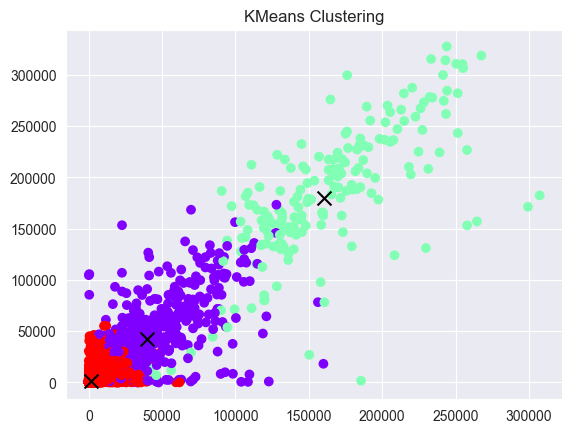

In [56]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the CSV data
data = pd.read_csv("/Users/TracyTao/Desktop/Singapore/NUS/PHM5005/ML/GSE68833_series_matrix.txt", sep="\t", index_col=0)

data.dropna(inplace=True)

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the data
kmeans.fit(data)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers)

# Plot the data points and cluster centers
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100)
# plt.xlabel(data.columns[0])
# plt.ylabel(data.columns[1])
plt.title("KMeans Clustering")
plt.show()


In [57]:
data

,GSM1682614,GSM1682615,GSM1682616,GSM1682617,GSM1682618,GSM1682619,GSM1682620,GSM1682621,GSM1682622,GSM1682623,...,GSM1682787,GSM1682788,GSM1682789,GSM1682790,GSM1682791,GSM1682792,GSM1682793,GSM1682794,GSM1682795,GSM1682796
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,492.5,992.29140,639.92070,1586.24200,673.6545,551.45730,813.2,923.1,936.8,447.4,...,526.0,386.99880,437.0,1158.5080,424.8953,307.7,690.0,489.7,1520.1,608.7
1053_at,988.5,1671.24800,2475.51500,1669.51600,2246.7310,3581.88300,2036.9,3010.8,1842.4,2510.9,...,3089.0,2089.25400,2114.9,1776.0150,3228.1410,2592.3,1728.6,1819.2,1934.7,2529.7
117_at,1677.0,312.99640,369.92770,395.18710,857.8096,283.24880,1500.6,556.7,1709.3,137.5,...,260.2,289.74540,1857.9,2136.7030,684.3458,560.6,171.4,359.4,502.4,337.6
121_at,2856.2,1514.23300,2167.40500,1687.89400,1973.0640,2442.95100,2501.9,945.0,1620.9,1004.6,...,1690.2,1917.71600,3028.3,1978.1750,1530.3450,1570.6,2796.8,2421.2,4157.4,2931.3
1255_g_at,197.5,68.79980,93.66864,137.29080,83.8687,121.96210,495.8,151.9,81.3,228.8,...,31.9,85.57195,548.4,157.8446,174.4753,157.8,246.3,235.1,663.4,167.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91703_at,1879.6,2539.49000,1080.24300,1232.41600,2170.9720,635.03580,788.0,1750.6,2216.3,627.4,...,1294.4,693.34940,1701.4,3468.4490,1372.8840,1154.2,946.3,1769.5,1788.1,1134.7
91816_f_at,621.3,270.35410,137.35300,151.14230,342.4965,340.64690,383.5,281.9,708.1,378.7,...,308.6,201.26100,785.1,181.9713,383.4814,24.7,293.0,889.8,817.9,396.2
91826_at,341.1,64.33327,150.78130,88.97958,1244.3440,53.25038,504.5,37.2,50.7,58.8,...,126.8,39.99625,104.9,439.1404,773.5029,103.8,102.8,472.6,404.5,28.2
